## Skill Assessment: Bayou Meto Lidar Quality Assessment (ungraded)
* Pull the csv file BayouMeto_LiDAR_QA.csv file from the Data folder in this project.
** This file contains the locations of 40 or so check points that will be used to assess the quality of the height measured by a airborne LiDAR (LidarZ column) against a high-precision GPS measurment (GPSZ). The file contains a uniqued check point id (ID) and a Region column indicating two separate collection campaigns, and a LandCover column indicating the type of land cover over the check point.
Perform the following analyses in the most efficient way you know using the Python skills you learned in Introduction to Programming
* Read the data file
* Plot the locations of the check points (the X and Y columns)
* Compute and print the mean and standard deviation of the differences between the Lidar-Z and GPS-Z measurements.
* Compute and print the mean and standard deviation of the differences between the LiDAR-Z and GPS-Z measurements by Region.
* Compute and print the mean and standard deviation of the differences betweent the LiDAR-Z and GPS-Z measurements by LandCover.
* Qualitatively assess, in a comment section in your script, whether measurement quality is affected by Region or LandCover
* Create a plot of your choice to illustrate your assessment.
* Deliver your answers in the form of a documented Python script

In [1]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading in the data. Note that I put the csv file in the directory to make things a little easier.
data = pd.read_csv("BayouMeto_Lidar_QA.csv")
pd.DataFrame.head(data)

,Region,ID,Description,X,Y,GPS-Z,Lidar-Z,LandCover
0,North,21,Lonoke Park,600612.683,3849204.812,73.620,73.684,Asphalt
1,North,22,Lonoke HS Parking,600123.308,3849067.230,73.852,73.973,Asphalt
2,North,26,England HS Parking,595917.787,3822919.619,68.964,69.088,Asphalt
3,North,39,Carlisle Park,614680.847,3850053.041,70.818,70.955,Asphalt
4,South,8,5800-50063355,613953.929,3805055.048,58.563,58.518,Asphalt


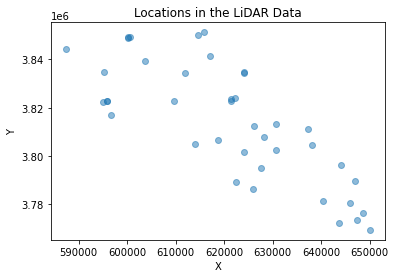

In [3]:
# Plot the locations of the check points (the X and Y columns)

plt.scatter(data["X"], data["Y"], alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Locations in the LiDAR Data")
plt.show()

In [4]:
# Compute and print the mean and standard deviation of the differences between the Lidar-Z and GPS-Z measurements.

# Create a difference column for the Lidar-Z and GPS-Z measurements and set it as a variable
data["difference"] = data["Lidar-Z"] - data["GPS-Z"]
difference = data["difference"]

# Calculate the mean and standard deviation
print("Mean difference: " + str(difference.mean()))
print("Standard deviation difference: " + str(difference.std()))

Mean difference: 0.07010000000000005
Standard deviation difference: 0.12297629540187603


We can see from this that the 2 forms of measurement are fairly close to each ofther.

In [5]:
# Compute and print the mean and standard deviation of the differences between the Lidar-Z and GPS-Z measurements by region

# Create variables

region_difference = data.groupby("Region")["difference"]

mean_difference_region = region_difference.mean()
stdv_difference_region = region_difference.std()

# Print the differences
print("Mean difference by region: " + str(mean_difference_region) + "\n")
print("Standard deviation difference by region: " + str(stdv_difference_region))

Mean difference by region: Region
North    0.1397
South    0.0005
Name: difference, dtype: float64

Standard deviation difference by region: Region
North    0.117374
South    0.084068
Name: difference, dtype: float64


In [6]:
# Compute and print the mean and standard deviation of the differences between the Lidar-Z and GPS-Z measurements by landcover

# Create variables

landcover_difference = data.groupby("LandCover")["difference"]

mean_difference_landcover = landcover_difference.mean()
stdv_difference_lancover = landcover_difference.std()

# Print the differences
print("Mean difference by region: " + str(mean_difference_landcover) + "\n")
print("Standard deviation difference by region: " + str(mean_difference_landcover))

Mean difference by region: LandCover
Asphalt    0.048714
Dirt       0.019143
Forest     0.106143
Grass      0.078900
Scrub      0.088556
Name: difference, dtype: float64

Standard deviation difference by region: LandCover
Asphalt    0.048714
Dirt       0.019143
Forest     0.106143
Grass      0.078900
Scrub      0.088556
Name: difference, dtype: float64


## Insights?
Looking at these calculations, we can see that the measurements differ the most are in Northern regions and in forest and scrub areas. The reason why forest and scrub areas are inconsistent is likely because one of the measurement types (probably the Lidar measurement) is more sensitive to foliage, such as tall trees, which would change the measurements of the landscape. Northern regions also have quite varying measurements between the 2 methods, which is also likely because of the topography of the north regions compared to the south regions. Southern regions are likely more flat and have less forest.

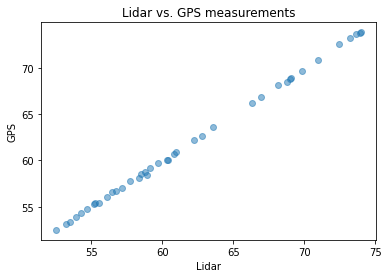

In [7]:
# plotting to show difference between lidar and gps

plt.scatter(data["Lidar-Z"], data["GPS-Z"], alpha=0.5)
plt.xlabel("Lidar")
plt.ylabel("GPS")
plt.title("Lidar vs. GPS measurements")
plt.show()

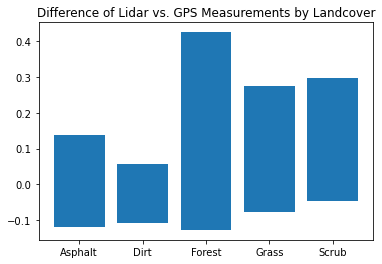

In [17]:
# Graphing the difference of Lidar and GPS by landcover

plt.bar(data["LandCover"].values, data["difference"])
plt.title("Difference of Lidar vs. GPS Measurements by Landcover")
plt.show()

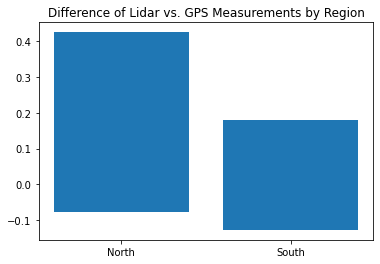

In [ ]:
# Difference of Lidar and GPS by region

plt.bar(data["Region"].values, data["difference"])
plt.title("Difference of Lidar vs. GPS Measurements by Region")
plt.show()